# Import Modules (Pandas and Matplotlib)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'training.csv'
data = pd.read_csv(url,index_col=0)


## 1.Examine the dataset. Are there any missing observations or columns where the data do not seem valid?



In [17]:
 #how to check if null values in columns
print(data.isnull().values.any())
print(data.isna().values.any())

print(data['Q4'].value_counts())
data['Q4'] = data['Q4'].apply(lambda x: 7 if x >= 7 else x)

print(data['Q4'].value_counts())

False
False
3    3446
1    1199
2    1046
6     708
5     467
7     192
4      34
8       2
Name: Q4, dtype: int64
3    3446
1    1199
2    1046
6     708
5     467
7     194
4      34
Name: Q4, dtype: int64


In a search to find any missing observations or columns where the data do not seem valid . I found that there are no missing values or NaN values .

## 2.Get basic descriptive statistics for the dataset.



In [3]:
print(data.describe())

                Q1           Q2           Q3           Q4           Q5  \
count  7094.000000  7094.000000  7094.000000  7094.000000  7094.000000   
mean     38.239498     1.559910     1.787426     3.059769     2.548915   
std      16.332148     0.496433     1.165160     1.556976     1.534257   
min      16.000000     1.000000     1.000000     1.000000     1.000000   
25%      25.000000     1.000000     1.000000     2.000000     1.000000   
50%      35.000000     2.000000     1.000000     3.000000     3.000000   
75%      48.000000     2.000000     3.000000     3.000000     4.000000   
max     100.000000     2.000000     4.000000     7.000000     6.000000   

                Q6           Q7         Q8_1         Q8_2         Q8_3  ...  \
count  7094.000000  7094.000000  7094.000000  7094.000000  7094.000000  ...   
mean      1.840569     1.397942     0.062165     0.630110     0.058077  ...   
std       0.366103     0.489508     0.241472     0.482809     0.233906  ...   
min       1.00000

The count for each is 7094 showing that no information is missing . The mean hows that the average age is 38 . Most of the graphs have min and max ranging from 0- 4 , as they are option based and not seperate numbers.

## 3.Create appropriate graphs to visually represent the relationship between financial services accessed (non, momible, both) and age, gender, marital status, land ownership and type of income.

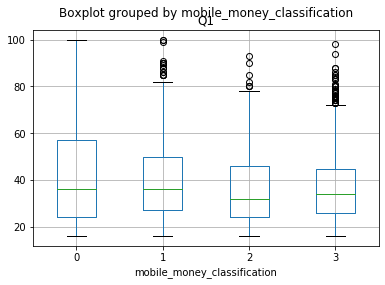

In [3]:

data.boxplot(column=['Q1'], by='mobile_money_classification')
plt.show()



The as we can see from the boxplot graph explaining age , that more people do not have any form of mobile . This is represented at 0 , the have a fair young representative but have the oldest person aged at 100. This is understandable as old people arent as quick to trust technology and areny as technologically savy . From 2,3 (use mobile money) the box begins to become smaller showing a concentrated group but the age rage of the group is faily low with q3 and q1 being 45 and 25 showing they are still faily young. The oldest person not using mobile money is close to 80 seen at the whisker of box 2.

Q2                           male  female
mobile_money_classification              
0                             468     918
1                             695    1083
2                             354     450
3                            1605    1521


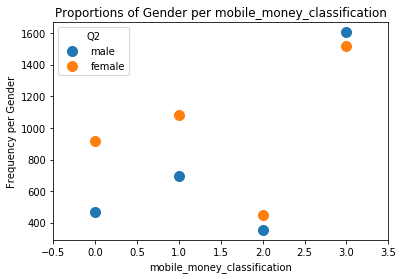

In [5]:
pivot = data[['mobile_money_classification', 'Q2']].pivot_table(index=['mobile_money_classification'], columns='Q2', aggfunc=len)
pivot = pivot.rename(columns={1: "male", 2: "female"})
print(pivot)
ax = pivot.plot(style='o', markersize=10)
ax.set_ylabel("Frequency per Gender")
ax.set_xlim([-0.5,3.5])
plt.title('Proportions of Gender per mobile_money_classification')
plt.show()


More females are not using mobile money as shown in point 0 and 1. As we start to use mobile money the gap between the two genders subsides as seen in x = 2 where they only use mobile money.But when the use mobile money and other resources they both shoot up. Meaning more people(both sexes) dont want mobile money as their only financial asset. So they realise the importance of mobile money but need another fallback. This could mean if a bank were to solely rely on mobile money they would lose customers , but offering another service this could increase customers and revenue. This could also be due to the distrust people have with technology and prefer a little human interaction .


Q3                           Married  Divorced  Widowed  Single/never married
mobile_money_classification                                                  
0                                782       127      235                   242
1                               1216       177      185                   200
2                                463        94       61                   186
3                               2087       289      197                   553


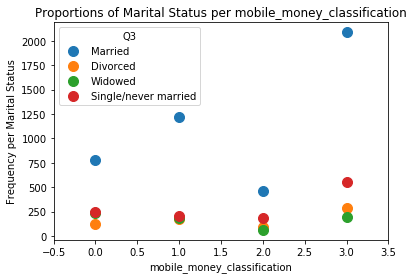

In [6]:
pivot = data[['mobile_money_classification', 'Q3']].pivot_table(index=['mobile_money_classification'], columns='Q3', aggfunc=len)
pivot = pivot.rename(columns={1: "Married", 2: "Divorced", 3: "Widowed", 4: "Single/never married"})
print(pivot)
ax = pivot.plot(style='o', markersize=10)
ax.set_ylabel("Frequency per Marital Status")
ax.set_xlim([-0.5,3.5])
plt.title('Proportions of Marital Status per mobile_money_classification')
plt.show()

Married peple are the leading people in all categories ranging from no mobile money to using mobile money. This could mean majority of the data is majority is married if we looking at this graph. Single,Widowed and Divorced all have low uses of no mobile money. But the fact that statistically more people are single thank married this shows that this data is screwed in terms of married people. This could also explain why the genders increase together in the previous table as those might be the married people assuming its a hetrosexual marriage. But another observation is as the use of mobile money increases so does he frequency of the single people. This could be friends needing money as you dont have to ask a second party as married people do. Also spoiling significant potential lovers may also add to thsi as seen by people sending ewallets when dating . 

Q6                           Own Land   Dont Own Land
mobile_money_classification                          
0                                  134           1252
1                                  245           1533
2                                  105            699
3                                  647           2479


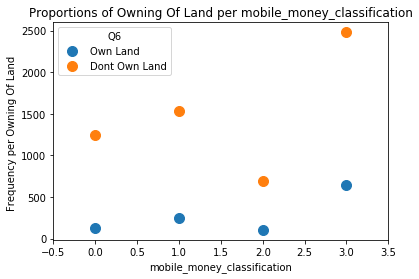

In [7]:
pivot = data[['mobile_money_classification', 'Q6']].pivot_table(index=['mobile_money_classification'], columns='Q6', aggfunc=len)
pivot = pivot.rename(columns={1: "Own Land ", 2: "Dont Own Land"})
print(pivot)
ax = pivot.plot(style='o', markersize=10)
ax.set_ylabel("Frequency per Owning Of Land ")
ax.set_xlim([-0.5,3.5])
plt.title('Proportions of Owning Of Land per mobile_money_classification')
plt.show()

People who own land perform poorly in comparison to those who own land , butits not a hugwe indication of usage of mobile money . 

Q8_1                           No  Yes
mobile_money_classification           
0                            1367   19
1                            1747   31
2                             774   30
3                            2765  361


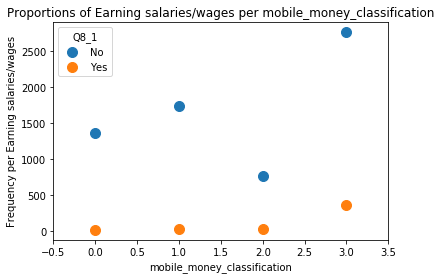

In [8]:
pivot = data[['mobile_money_classification', 'Q8_1']].pivot_table(index=['mobile_money_classification'], columns='Q8_1', aggfunc=len)
pivot = pivot.rename(columns={0: "No", 1: "Yes"})
print(pivot)
ax = pivot.plot(style='o', markersize=10)
ax.set_ylabel("Frequency per Earning salaries/wages")
ax.set_xlim([-0.5,3.5])
plt.title('Proportions of Earning salaries/wages per mobile_money_classification')
plt.show()

Q8_2                           No   Yes
mobile_money_classification            
0                             613   773
1                             498  1280
2                             371   433
3                            1142  1984


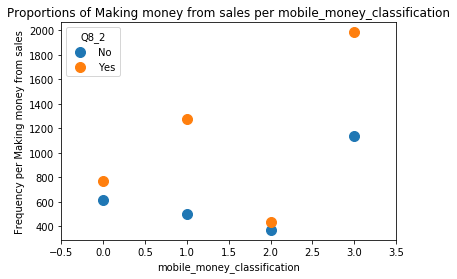

In [9]:
pivot = data[['mobile_money_classification', 'Q8_2']].pivot_table(index=['mobile_money_classification'], columns='Q8_2', aggfunc=len)
pivot = pivot.rename(columns={0: "No", 1: "Yes"})
print(pivot)
ax = pivot.plot(style='o', markersize=10)
ax.set_ylabel("Frequency per Making money from sales")
ax.set_xlim([-0.5,3.5])
plt.title('Proportions of Making money from sales per mobile_money_classification')
plt.show()

People who earn a salary/wages are more likely to spend less and use mobile money. This might be bacuase they prefer to use the bank or other bank features . Whereas the people mostly using mobile money arent earning salaries . They make up the people who sell goods where you can see a direct corolation between the number of them and using mobile money. Street merchants might use mobile money to act as a way of payment instead of cash to the customer . 

## 4.Create appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.

In [10]:
condition = (data['mobile_money_classification'] == 2)|(data['mobile_money_classification'] == 3)
#git_log[(git_log['timestamp']>=first_commit_timestamp)&(git_log['timestamp']<=last_commit_timestamp)]
newDF = data[condition]


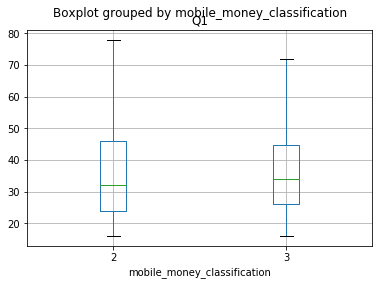

In [11]:
newDF.boxplot(column=['Q1'], by='mobile_money_classification', showfliers=False)
#plt.title('Proportions of Ages')
plt.show()

Q2                           male  female
mobile_money_classification              
2                             354     450
3                            1605    1521


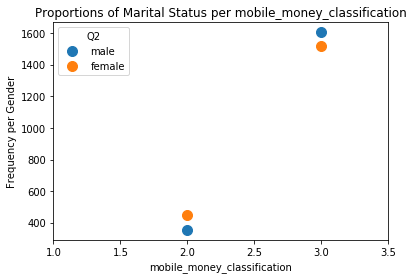

In [12]:
pivot = newDF[['mobile_money_classification', 'Q2']].pivot_table(index=['mobile_money_classification'], columns='Q2', aggfunc=len)
pivot = pivot.rename(columns={1: "male", 2: "female"})
print(pivot)
ax = pivot.plot(style='o', markersize=10)
ax.set_ylabel("Frequency per Gender")
ax.set_xlim([1,3.5])
plt.title('Proportions of Marital Status per mobile_money_classification')
plt.show()

Q3                           Married  Divorced  Widowed  Single/never married
mobile_money_classification                                                  
2                                463        94       61                   186
3                               2087       289      197                   553


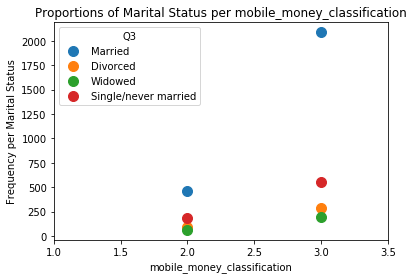

In [33]:
pivot = newDF[['mobile_money_classification', 'Q3']].pivot_table(index=['mobile_money_classification'], columns='Q3', aggfunc=len)
pivot = pivot.rename(columns={1: "Married", 2: "Divorced", 3: "Widowed", 4: "Single/never married"})
print(pivot)
ax = pivot.plot(style='o', markersize=10)
ax.set_ylabel("Frequency per Marital Status")
ax.set_xlim([1,3.5])
plt.title('Proportions of Marital Status per mobile_money_classification')
plt.show()

Q6                           Married  Divorced
mobile_money_classification                   
2                                105       699
3                                647      2479


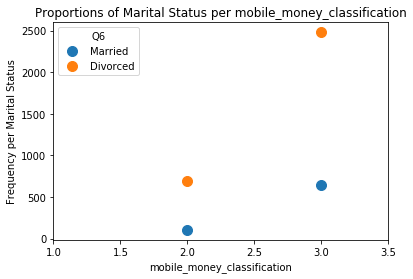

In [30]:
pivot = newDF[['mobile_money_classification', 'Q6']].pivot_table(index=['mobile_money_classification'], columns='Q6', aggfunc=len)
pivot = pivot.rename(columns={1: "Married", 2: "Divorced"})
print(pivot)
ax = pivot.plot(style='o', markersize=10)
ax.set_ylabel("Frequency per Marital Status")
ax.set_xlim([1,3.5])
plt.title('Proportions of Marital Status per mobile_money_classification')
plt.show()

Q8_1                           No  Yes
mobile_money_classification           
2                             774   30
3                            2765  361


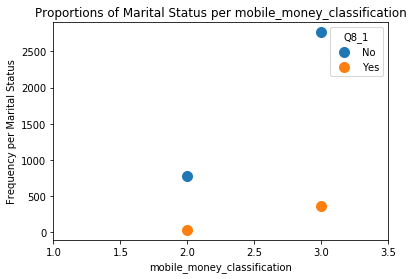

In [32]:
pivot = newDF[['mobile_money_classification', 'Q8_1']].pivot_table(index=['mobile_money_classification'], columns='Q8_1', aggfunc=len)
pivot = pivot.rename(columns={0: "No", 1: "Yes"})
print(pivot)
ax = pivot.plot(style='o', markersize=10)
ax.set_ylabel("Frequency per Marital Status")
ax.set_xlim([1,3.5])
plt.title('Proportions of Marital Status per mobile_money_classification')
plt.show()

## 5.What can you conclude about use of financial services in Tanzania? Which demographic factors are associated with mobile money use?

From viewing the graphs above i can say age is huge contributor to usage of mobile money . They are indirectly proportional th lower the age range the more likely they are to use mobile money .